In [2]:
import pandas as pd 

# Reading Data
df = pd.read_csv("data/seasonal_data.csv")

# Cleaning Data and converting to % of total sales
def clean_data(row):
    total = int(row['Total'].replace(',', ''))
    for col in row.index:
        if col not in ['Total', 'Year']:
            value = row[col].replace(",", '')
            row[col] = int(value) / total

    return row

df = df.apply(clean_data, axis=1)
df.head(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2022,0.072329,0.071531,0.084187,0.084188,0.087073,0.085935,0.084932,0.086586,0.081870,0.084649,0.084846,0.091875,"8,070,945"
1,2021,0.070067,0.066446,0.085208,0.084677,0.086869,0.085822,0.085631,0.085041,0.081707,0.085500,0.087697,0.095336,"7,366,214"
2,2020,0.077264,0.077063,0.076533,0.065605,0.081306,0.085772,0.088370,0.087854,0.085464,0.089041,0.087481,0.098246,"6,223,300"
3,2019,0.073798,0.071462,0.083017,0.081877,0.087936,0.083267,0.085472,0.087674,0.079750,0.084507,0.086146,0.095094,"6,169,122"
4,2018,0.074258,0.072771,0.084975,0.080293,0.088280,0.084774,0.084413,0.086978,0.079705,0.084106,0.086565,0.092883,"5,983,129"
5,2017,0.073617,0.072982,0.084279,0.081257,0.086283,0.084033,0.082921,0.085526,0.081927,0.083028,0.086809,0.097338,"5,732,863"
6,2016,0.072979,0.075376,0.083703,0.081931,0.085380,0.084407,0.083917,0.085677,0.081468,0.082308,0.084859,0.097994,"5,506,177"
7,2015,0.074464,0.072630,0.083433,0.082201,0.086916,0.084102,0.085934,0.085630,0.080887,0.083478,0.083406,0.096919,"5,350,925"
8,2014,0.073487,0.072907,0.082988,0.082710,0.088042,0.083066,0.084988,0.086552,0.080796,0.084069,0.084182,0.096212,"5,217,688"
9,2013,0.075057,0.074755,0.084300,0.081663,0.087389,0.082911,0.084450,0.086982,0.079226,0.083128,0.084753,0.095387,"5,002,918"


In [3]:
# Priliminary Data Analysis
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2007.000000,0.073285,0.072939,0.082861,0.081335,0.086249,0.084514,0.084643,0.086450,0.081067,0.083865,0.084873,0.097920
std,9.092121,0.001906,0.002352,0.002036,0.003112,0.001691,0.001053,0.001392,0.001113,0.001466,0.001746,0.002019,0.003535
min,1992.000000,0.069242,0.066446,0.076533,0.065605,0.081306,0.082911,0.082054,0.084285,0.077517,0.079663,0.076406,0.087494
25%,1999.500000,0.072122,0.071621,0.082134,0.081248,0.085349,0.083521,0.083818,0.085653,0.079885,0.082962,0.084127,0.096091
50%,2007.000000,0.073487,0.072907,0.083006,0.081663,0.086297,0.084522,0.084625,0.086591,0.081355,0.083478,0.085079,0.097994
75%,2014.500000,0.074194,0.073546,0.084275,0.082199,0.087114,0.085460,0.085440,0.087209,0.081801,0.084911,0.086078,0.099500
max,2022.000000,0.078022,0.078307,0.085809,0.084677,0.090618,0.086445,0.088370,0.088826,0.085464,0.089041,0.087697,0.104287


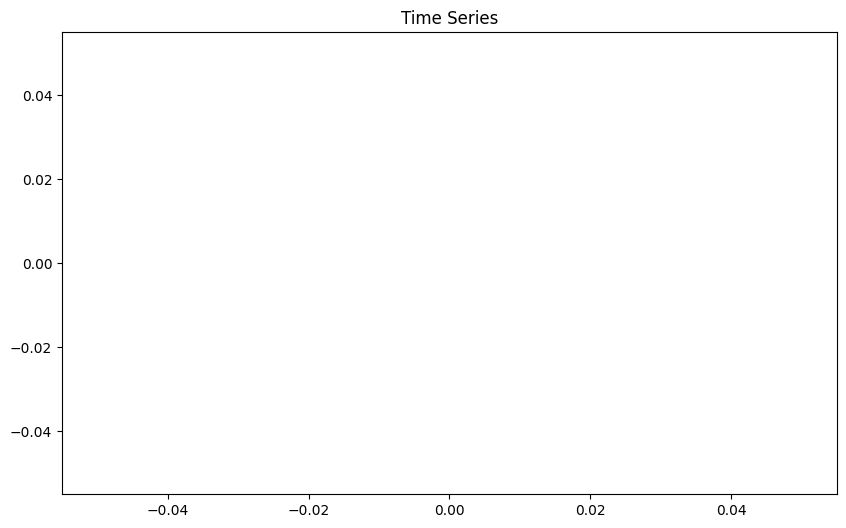

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


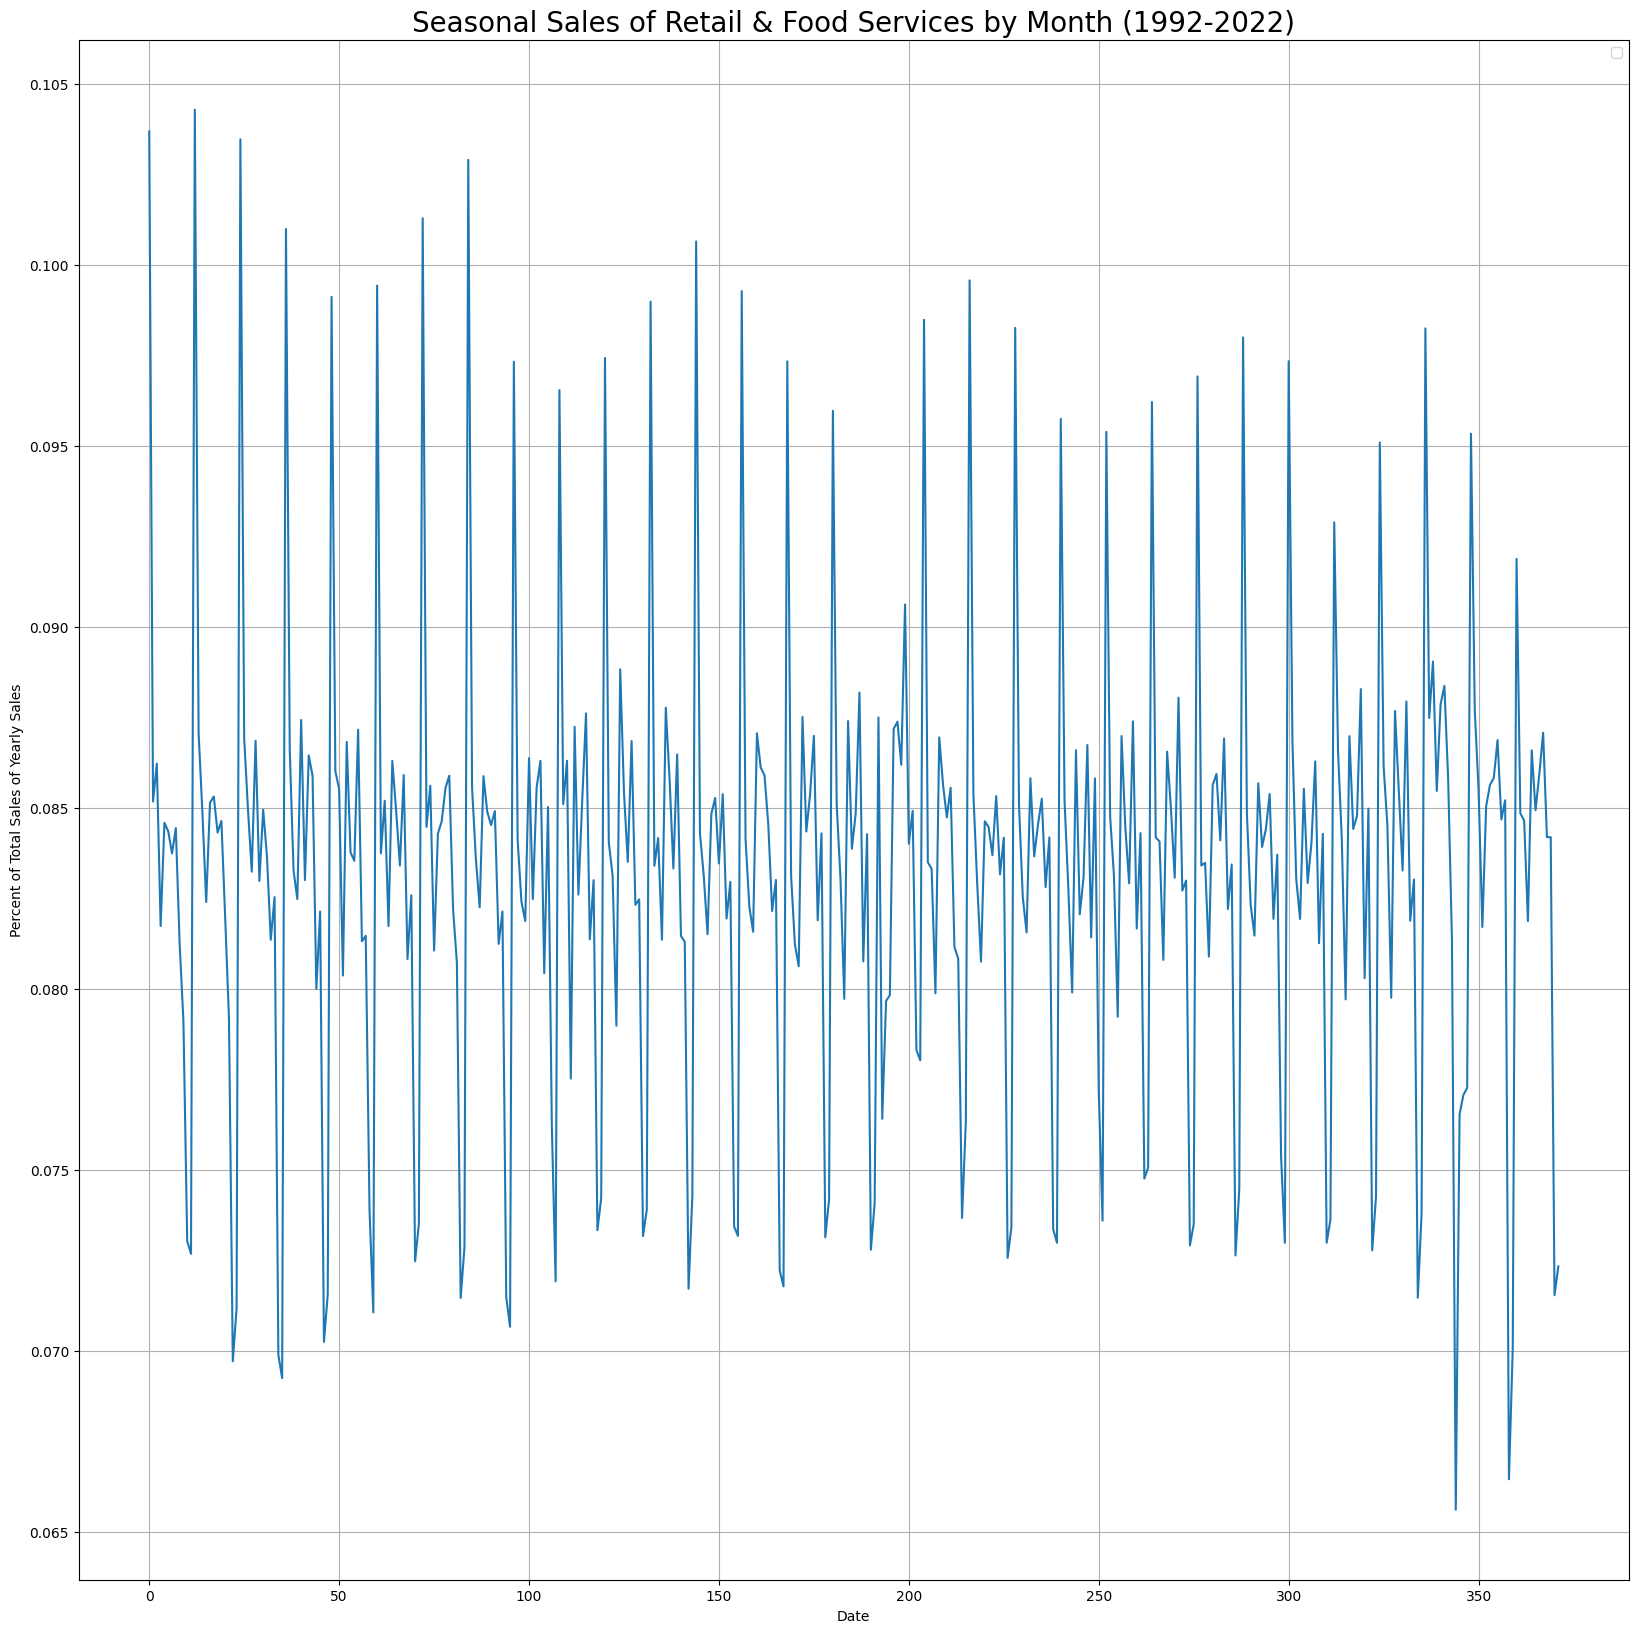

In [4]:
import matplotlib.pyplot as plt

# Extracting data to plot
data = df.values.tolist()
trimmed_data = [sublist[1:-1] for sublist in data]
y = [data_point for sublist in trimmed_data for data_point in sublist]

y.reverse()
x = [i for i in range(len(y))]

# Plotting data# Visual Inspection: Plotting the Time Series
plt.figure(figsize=(10, 6))
plt.plot()
plt.title('Time Series')
plt.show()
plt.figure(figsize=(20, 20))
plt.plot(x, y)

plt.title("Seasonal Sales of Retail & Food Services by Month (1992-2022)", fontsize=20)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Percent of Total Sales of Yearly Sales", fontsize=10)

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as sgt

# Plotting Autocorrelation
plt.figure(figsize=(12, 5))

Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


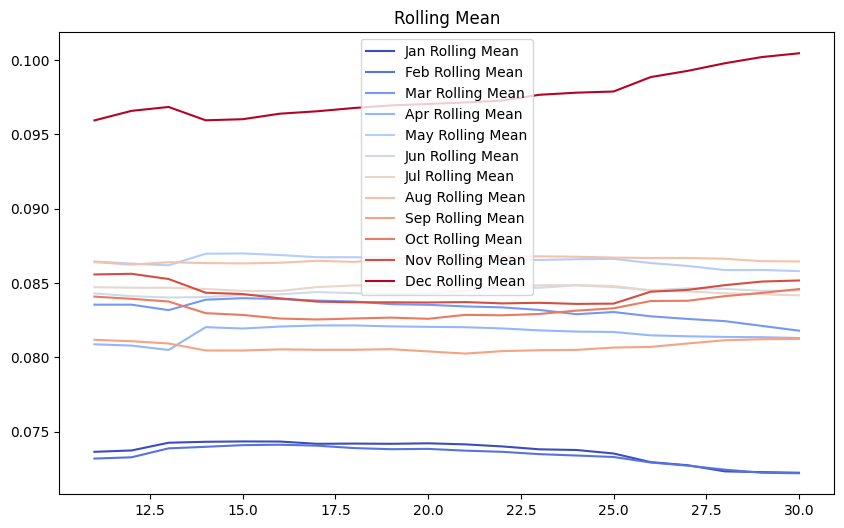

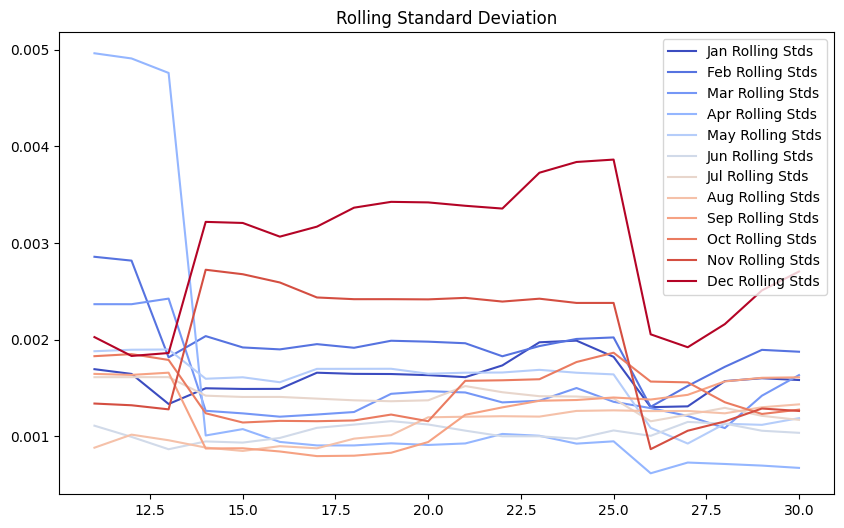

In [8]:
import numpy as np 

# Rolling Statistics
rolling_means = {}
rolling_stds = {}

# Calculating rolling mean and std for each month
for month in df.columns:
    if(month not in['Year', 'Total']):
        print(month)
        rolling_means[month] = df[month].rolling(window=12).mean()
        rolling_stds[month] = df[month].rolling(window=12).std()

colors = plt.cm.coolwarm(np.linspace(0, 1, len(rolling_means.keys())))

# Plotting rolling mean and std
plt.figure(figsize=(10, 6))
for i, month in enumerate(rolling_means.keys()):
    plt.plot(rolling_means[month], color=colors[i], label=f'{month} Rolling Mean')
plt.legend()
plt.title('Rolling Mean')
plt.show()

plt.figure(figsize=(10, 6))
for i, month in enumerate(rolling_stds.keys()):
    plt.plot(rolling_stds[month], color=colors[i], label=f'{month} Rolling Stds')
plt.legend()
plt.title('Rolling Standard Deviation')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller Test
adf_test = adfuller(x, autolag='AIC')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# KPSS Test
kpss_test = kpss(x, regression='c')
print(f'KPSS Statistic: {kpss_test[0]}')
print(f'p-value: {kpss_test[1]}')

ADF Statistic: -8.784117916820035
p-value: 2.3335719294842243e-14
KPSS Statistic: 3.2025936902443912
p-value: 0.01


/tmp/ipykernel_69317/803336555.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression='c')
